![CDS 411 logo](../../img/cds-411-logo.png)

# Class 6: DataFrames and visualization

---

![CC BY-SA 4.0 license](../../img/cc-by-sa.png)

This notebook is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).

## Load packages

*   Note the `%matplotlib inline` statement. This is required if you want to embed images in a Jupyter notebook.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Use the Pandas library to do statistics on tabular data.

*   Pandas is a widely-used Python library for statistics, particularly on tabular data.
*   Borrows many features from R's dataframes.
    *   A 2-dimenstional table whose columns have names and potentially have different data types.
*   Load it with `import pandas`.
*   Read a Comma Separate Values (CSV) data file with `pandas.read_csv`.
    *   Argument is the name of the file to be read.
    *   Assign result to a variable to store the data that was read.

In [2]:
data = pd.read_csv('../../data/gapminder/gapminder_gdp_oceania.csv')
data

,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
0,Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
1,New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


In [3]:
print(data)

       country  gdpPercap_1952  gdpPercap_1957  gdpPercap_1962  \
0    Australia     10039.59564     10949.64959     12217.22686   
1  New Zealand     10556.57566     12247.39532     13175.67800   

   gdpPercap_1967  gdpPercap_1972  gdpPercap_1977  gdpPercap_1982  \
0     14526.12465     16788.62948     18334.19751     19477.00928   
1     14463.91893     16046.03728     16233.71770     17632.41040   

   gdpPercap_1987  gdpPercap_1992  gdpPercap_1997  gdpPercap_2002  \
0     21888.88903     23424.76683     26997.93657     30687.75473   
1     19007.19129     18363.32494     21050.41377     23189.80135   

   gdpPercap_2007  
0     34435.36744  
1     25185.00911  


### Note about Pandas DataFrames/Series

A [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) is a collection of [Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html); The DataFrame is the way Pandas represents a table, and Series is the data-structure Pandas use to represent a column.

Pandas is built on top of the [Numpy](http://www.numpy.org/) library, which in practice means that most of the methods defined for Numpy Arrays apply to Pandas Series/DataFrames.

What makes Pandas so attractive is the powerful interface to access individual records of the table, proper handling of missing values, and relational-databases operations between DataFrames.

## Use `index_col` to specify that a column's values should be used as row headings.

*   Row headings are numbers (0 and 1 in this case).
*   Really want to index by country.
*   Pass the name of the column to `read_csv` as its `index_col` parameter to do this.

In [4]:
data = pd.read_csv('../../data/gapminder/gapminder_gdp_oceania.csv', index_col='country')
data

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


## Use `DataFrame.info` to find out more about a dataframe.

*   This is a `DataFrame`
*   Two rows named `'Australia'` and `'New Zealand'`
*   Twelve columns, each of which has two actual 64-bit floating point values.
*   Uses 208 bytes of memory.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Australia to New Zealand
Data columns (total 12 columns):
gdpPercap_1952    2 non-null float64
gdpPercap_1957    2 non-null float64
gdpPercap_1962    2 non-null float64
gdpPercap_1967    2 non-null float64
gdpPercap_1972    2 non-null float64
gdpPercap_1977    2 non-null float64
gdpPercap_1982    2 non-null float64
gdpPercap_1987    2 non-null float64
gdpPercap_1992    2 non-null float64
gdpPercap_1997    2 non-null float64
gdpPercap_2002    2 non-null float64
gdpPercap_2007    2 non-null float64
dtypes: float64(12)
memory usage: 208.0+ bytes


## The `DataFrame.columns` variable stores information about the dataframe’s columns.

*   Note that this is data, not a method.
    *   Like `math.pi`.
    *   So do not use `()` to try to call it.
*   Called a member variable, or just member.

In [6]:
data.columns

Index(['gdpPercap_1952', 'gdpPercap_1957', 'gdpPercap_1962', 'gdpPercap_1967',
       'gdpPercap_1972', 'gdpPercap_1977', 'gdpPercap_1982', 'gdpPercap_1987',
       'gdpPercap_1992', 'gdpPercap_1997', 'gdpPercap_2002', 'gdpPercap_2007'],
      dtype='object')

## Use `DataFrame.T` to transpose a dataframe.

*   Sometimes want to treat columns as rows and vice versa.
*   Transpose (written `.T`) doesn’t copy the data, just changes the program’s view of it.
*   Like `columns`, it is a member variable.

In [7]:
data.T

country,Australia,New Zealand
gdpPercap_1952,10039.59564,10556.57566
gdpPercap_1957,10949.64959,12247.39532
gdpPercap_1962,12217.22686,13175.67800
gdpPercap_1967,14526.12465,14463.91893
gdpPercap_1972,16788.62948,16046.03728
gdpPercap_1977,18334.19751,16233.71770
gdpPercap_1982,19477.00928,17632.41040
gdpPercap_1987,21888.88903,19007.19129
gdpPercap_1992,23424.76683,18363.32494
gdpPercap_1997,26997.93657,21050.41377


## Use `DataFrame.describe` to get summary statistics about data.

DataFrame.describe() gets the summary statistics of only the columns that have numerical data. All other columns are ignored, unless you use the argument `include='all'`.

In [8]:
data.describe()

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,10298.085650,11598.522455,12696.452430,14495.021790,16417.33338,17283.957605,18554.709840,20448.040160,20894.045885,24024.175170,26938.778040,29810.188275
std,365.560078,917.644806,677.727301,43.986086,525.09198,1485.263517,1304.328377,2037.668013,3578.979883,4205.533703,5301.853680,6540.991104
min,10039.595640,10949.649590,12217.226860,14463.918930,16046.03728,16233.717700,17632.410400,19007.191290,18363.324940,21050.413770,23189.801350,25185.009110
25%,10168.840645,11274.086022,12456.839645,14479.470360,16231.68533,16758.837652,18093.560120,19727.615725,19628.685413,22537.294470,25064.289695,27497.598692
50%,10298.085650,11598.522455,12696.452430,14495.021790,16417.33338,17283.957605,18554.709840,20448.040160,20894.045885,24024.175170,26938.778040,29810.188275
75%,10427.330655,11922.958888,12936.065215,14510.573220,16602.98143,17809.077557,19015.859560,21168.464595,22159.406358,25511.055870,28813.266385,32122.777857
max,10556.575660,12247.395320,13175.678000,14526.124650,16788.62948,18334.197510,19477.009280,21888.889030,23424.766830,26997.936570,30687.754730,34435.367440


## Writing manual data to a file

There are several ways to structure your data when manually creating a Pandas `DataFrame`. Below shows how to create the `DataFrame` using a Python dictionary.

In [9]:
manual_data = {
    "x": [1, 2, 3],
    "y": [2, 4, 6]
}
manual_df = pd.DataFrame(manual_data)

The dictionary keys become the column names and the lists become the rows.

In [10]:
manual_df

,x,y
0,1,2
1,2,4
2,3,6


Use the `.to_csv()` method to save the data to disk. If you don't want the row indices to be saved in the file, pass the argument `index=False` as shown below.

```python
manual_df.to_csv("manual_data.csv", index=False)
```

## Selecting values

To access a value at the position `[i, j]` of a DataFrame, we have two options, depending on what is the meaning of `i` in use. Remember that a DataFrame provides a index as a way to identify the rows of the table; a row, then, has a position inside the table as well as a label, which uniquely identifies its entry in the DataFrame.

First, let's load the Europe subset of the Gapminder dataset sot that we have more rows and columns to work with.

In [11]:
data = pd.read_csv(
    "../../data/gapminder/gapminder_gdp_europe.csv",
    index_col="country"
)

## Use `DataFrame.iloc[..., ...]` to select values by their (entry) position

Can specify location by numerical index analogously to 2D version of character selection in strings.

In [12]:
data.iloc[0, 0]

1601.056136

## Use `DataFrame.loc[..., ...]` to select values by their (entry) label.

Can specify location by row name analogously to 2D version of dictionary keys.

In [13]:
data.loc["Albania", "gdpPercap_1952"]

1601.056136

## Use `:` on its own to mean all columns or all rows.

*   Just like Python’s usual slicing notation.

In [14]:
# Would get the same result printing data.loc["Albania"] (without a second index).
data.loc["Albania", :]

gdpPercap_1952    1601.056136
gdpPercap_1957    1942.284244
gdpPercap_1962    2312.888958
gdpPercap_1967    2760.196931
gdpPercap_1972    3313.422188
gdpPercap_1977    3533.003910
gdpPercap_1982    3630.880722
gdpPercap_1987    3738.932735
gdpPercap_1992    2497.437901
gdpPercap_1997    3193.054604
gdpPercap_2002    4604.211737
gdpPercap_2007    5937.029526
Name: Albania, dtype: float64

## Select multiple columns or rows using `DataFrame.loc` and a named slice.

You can slice several columns for a single row.

In [15]:
data.loc["Albania", "gdpPercap_1962":"gdpPercap_1972"]

gdpPercap_1962    2312.888958
gdpPercap_1967    2760.196931
gdpPercap_1972    3313.422188
Name: Albania, dtype: float64

## Method chaining

Method chaining allows you to establish a visual pipeline of the transformations you apply to a dataset. Below, we use `.loc` to subset our dataset, then apply `.max()` to get the maximum values in the three remaining columns, and then take the average:

In [16]:
data \
    .loc["Albania":"Poland", "gdpPercap_1962":"gdpPercap_1972"] \
    .max() \
    .mean()

16303.415163333333

## Use comparisons to select data based on value.

*   Comparison is applied element by element.
*   Returns a similarly-shaped dataframe of `True` and `False`.

In [17]:
data_subset = data \
    .loc["Albania":"Poland", "gdpPercap_1962":"gdpPercap_1972"]

## Select values or NaN using a Boolean mask.

A frame full of Booleans is sometimes called a mask because of how it can be used.

*   Get the value where the mask is true, and NaN (Not a Number) where it is false.
*   Useful because NaNs are ignored by operations like max, min, average, etc.

In [18]:
mask = data_subset > 10000
data_subset[mask]

,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972
country,,,
Albania,NaN,NaN,NaN
Austria,10750.72111,12834.60240,16661.62560
Belgium,10991.20676,13149.04119,16672.14356
Bosnia and Herzegovina,NaN,NaN,NaN
Bulgaria,NaN,NaN,NaN
Croatia,NaN,NaN,NaN
Czech Republic,10136.86713,11399.44489,13108.45360
Denmark,13583.31351,15937.21123,18866.20721
Finland,NaN,10921.63626,14358.87590


The `.query()` method can also be used to find data using syntax that's reminiscent of R's filter rules and syntax in `dplyr`.

In [19]:
data_subset.query("gdpPercap_1972 > 10000 & gdpPercap_1967 > 12000")

,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972
country,,,
Austria,10750.72111,12834.60240,16661.62560
Belgium,10991.20676,13149.04119,16672.14356
Denmark,13583.31351,15937.21123,18866.20721
France,10560.48553,12999.91766,16107.19171
Germany,12902.46291,14745.62561,18016.18027
Iceland,10350.15906,13319.89568,15798.06362
Netherlands,12790.84956,15363.25136,18794.74567
Norway,13450.40151,16361.87647,18965.05551


## Adding new columns with transformations

You can create new columns that are the result of data transformations applied to existing columns. This example illustrates how to compute the ratio between the 1962 and 1972 GDP per capita for each country:

In [20]:
data_subset["ratio_62_to_72"] = \
    data_subset["gdpPercap_1962"] / data_subset["gdpPercap_1972"]
data_subset

,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,ratio_62_to_72
country,,,,
Albania,2312.888958,2760.196931,3313.422188,0.698036
Austria,10750.721110,12834.602400,16661.625600,0.645238
Belgium,10991.206760,13149.041190,16672.143560,0.659256
Bosnia and Herzegovina,1709.683679,2172.352423,2860.169750,0.597756
Bulgaria,4254.337839,5577.002800,6597.494398,0.644841
Croatia,5477.890018,6960.297861,9164.090127,0.597756
Czech Republic,10136.867130,11399.444890,13108.453600,0.773308
Denmark,13583.313510,15937.211230,18866.207210,0.719981
Finland,9371.842561,10921.636260,14358.875900,0.652686


## `matplotlib` is the most widely used scientific plotting library in Python.

*   Commonly use a sub-library called matplotlib.pyplot.
*   The Jupyter Notebook will render plots inline if we ask it to using a “magic” command.

```python
%matplotlib inline

import matplotlib.pyplot as plt
```

Simple plots are then (fairly) simple to create.

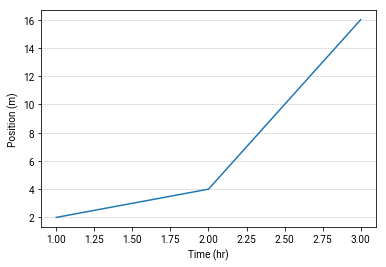

In [21]:
time = [1, 2, 3]
position = [2, 4, 16]

plt.plot(time, position)
plt.xlabel("Time (hr)")
plt.ylabel("Position (m)");

## It's easy to create a scatter plot instead of line plot

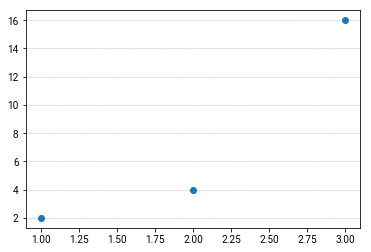

In [22]:
plt.plot(time, position, "o");

## Plot data directly from a Pandas dataframe.

*   We can also plot Pandas dataframes.
*   This implicitly uses `matplotlib.pyplot`.
*   Before plotting, we convert the column headings from a `string` to `integer` data type, since they represent numerical values

In [23]:
data = pd.read_csv('../../data/gapminder/gapminder_gdp_oceania.csv', index_col='country')
years = data.columns.str.strip('gdpPercap_')
data.columns = years.astype(int)

## Select and transform data, then plot it.

By default, `DataFrame.plot` plots with the rows as the X axis.
We can transpose the data in order to plot multiple series.

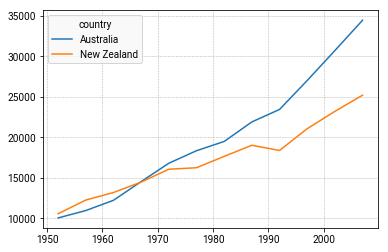

In [24]:
data.T.plot();

## Different themes and style

*   The `kind=` input in the `DataFrame` is how you change the plot aesthetic.
*   `plt.style.use()` lets you change the overall theme of your plots.

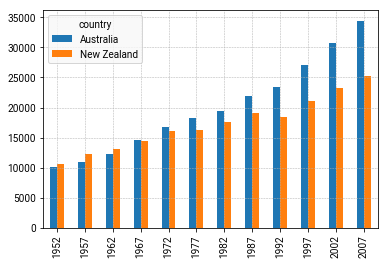

In [25]:
data.T.plot(kind="bar");

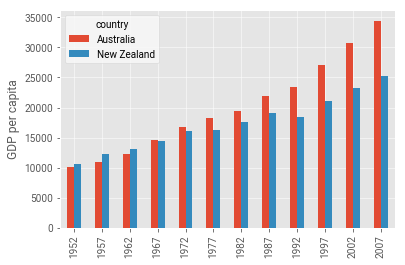

In [26]:
plt.style.use("ggplot")
data.T.plot(kind="bar")
plt.ylabel("GDP per capita");

## Data can also be plotted by calling the `matplotlib` `plot` function directly.

*   The command is `plt.plot(x, y)`
*   The color / format of markers can also be specified as an optical argument: e.g. ‘b-‘ is a blue line, ‘g–’ is a green dashed line.

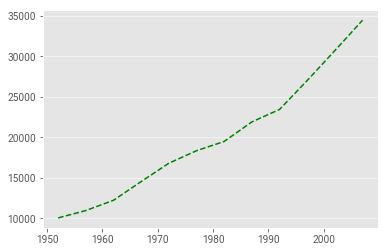

In [27]:
years = data.columns
gdp_australia = data.loc['Australia']

plt.plot(years, gdp_australia, 'g--');

## Can plot many sets of data together.

For complete control, extract the data from Pandas and use matplotlib directly.

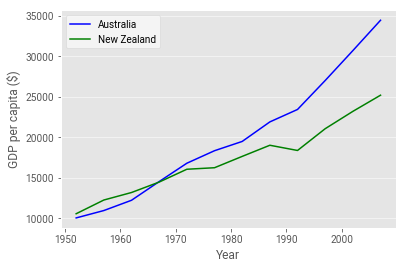

In [28]:
gdp_australia = data.loc['Australia']
gdp_nz = data.loc['New Zealand']

plt.plot(years, gdp_australia, 'b-', label='Australia')
plt.plot(years, gdp_nz, 'g-', label='New Zealand')

plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('GDP per capita ($)');

## Scatter plots with Pandas

*   Plot a scatter plot correlating the GDP of Australia and New Zealand
*   Use either plt.scatter or DataFrame.plot.scatter

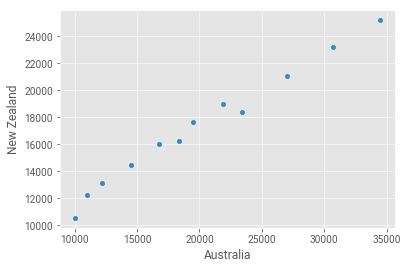

In [29]:
data.T.plot.scatter(x = "Australia", y = "New Zealand");

## Saving your plot to file

If you are satisfied with the plot you see you may want to save it to a file, perhaps to include it in a publication. There is a function in the matplotlib.pyplot module that accomplishes this: savefig. Calling this function, e.g. with

```python
plt.savefig('my_figure.png')
```

will save the current figure to the file `my_figure.png`. The file format will automatically be deduced from the file name extension (other formats are pdf, ps, eps and svg).

Note that functions in `plt` refer to a global figure variable and after a figure has been displayed to the screen (e.g. with `plt.show`) matplotlib will make this variable refer to a new empty figure. Therefore, make sure you call `plt.savefig` before the plot is displayed to the screen, otherwise you may find a file with an empty plot.

When using dataframes, data is often generated and plotted to screen in one line, and `plt.savefig` seems not to be a possible approach. One possibility to save the figure to file is then to

*   save a reference to the current figure in a local variable (with `plt.gcf`)
*   call the `savefig` class method from that varible.

```python
data.T.plot(kind='bar');
fig = plt.gcf() # get current figure
data.plot(kind='bar');
fig.savefig('gdp_comparison.png');
```

## Acknowledgments

Content from the following episodes of the Software Carpentry lesson [Plotting and Programming in Python](https://swcarpentry.github.io/python-novice-gapminder/) made available under the [CC BY 4.0 license](https://creativecommons.org/licenses/by/4.0/legalcode)

*   [Reading Tabular Data into DataFrames](https://swcarpentry.github.io/python-novice-gapminder/07-reading-tabular/index.html)

*   [Pandas DataFrames](https://swcarpentry.github.io/python-novice-gapminder/08-data-frames/index.html)

*   [Plotting](https://swcarpentry.github.io/python-novice-gapminder/09-plotting/index.html)